# Download Sentinel 2 data + LULC data using Google Earth Engine

In [1]:
import ee
import geemap
import os
import numpy as np
import tifffile

COUNTRY = "San Marino"#'Vatican City'#"Luxembourg"#
START_DATE = '2021-01-01'
END_DATE = '2021-12-31'
CLOUD_COVER = 10

PATCH_SIZE = 256

OUTPUT_FOLDER = f'./data/{COUNTRY}'

SENTINEL_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)


In [2]:
ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


In [3]:
ee.Initialize()
countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
roi = countries.filter(ee.Filter.eq('country_na', COUNTRY))

image_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
        .filterDate(START_DATE, END_DATE)\
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',CLOUD_COVER))\
        .filterBounds(roi)\
        # .median()\
        # .select(SENTINEL_BANDS)\
        # .clip(roi.geometry())\
#       ^--  median image was taken from all images

def create_quality_band(image):
    return image.addBands(image.select('MSK_CLDPRB').multiply(-1).rename('quality'))

image_collection = image_collection.map(create_quality_band)

image = image_collection.qualityMosaic('quality')
image = image.select(SENTINEL_BANDS).clip(roi.geometry())

land_cover_image = ee.ImageCollection('ESA/WorldCover/v200').first()\
                    .clip(roi.geometry())


In [4]:
grid = roi.geometry().coveringGrid("EPSG:3857", 10*PATCH_SIZE)
grid_data = grid.getInfo()


In [5]:
import json

with open('grid.json', 'w') as f:
    json.dump(grid_data, f)

In [15]:
print("Downloading Sentinel-2 data...")

TILES_FOLDER = f'{OUTPUT_FOLDER}/tiles'

if not os.path.exists(TILES_FOLDER):
    os.makedirs(TILES_FOLDER)

geemap.download_ee_image_tiles(
    image,
    features=grid,
    out_dir=TILES_FOLDER,
    prefix=COUNTRY,
    scale=10,
    crs="EPSG:3857"
)

San Marino01.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None


San Marino02.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino03.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino04.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino05.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino06.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino07.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino08.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino09.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino10.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino11.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino12.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino13.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino14.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino15.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino16.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino17.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino18.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino19.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino20.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino21.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino22.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino23.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino24.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino25.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino26.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino27.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino28.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino29.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino30.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino31.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino32.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino33.tif: |          | 0.00/6.29M (raw) [  0.0%] in 00:00 (eta:     ?)

Downloaded 33 tiles in 253.60672521591187 seconds.


In [24]:
print('Downloading land cover image...')

LUCL_FOLDER = f'{OUTPUT_FOLDER}/LUCL'

if not os.path.exists(LUCL_FOLDER):
    os.makedirs(LUCL_FOLDER)
    
geemap.download_ee_image_tiles(
    land_cover_image,
    features=grid,
    out_dir=LUCL_FOLDER,
    prefix=COUNTRY,
    scale=10,
    crs="EPSG:3857"
)



San Marino01.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino02.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino03.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino04.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino05.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino06.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino07.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino08.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino09.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino10.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino11.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino12.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino13.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino14.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino15.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino16.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino17.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino18.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino19.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino20.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino21.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino22.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino23.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino24.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino25.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino26.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino27.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino28.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino29.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino30.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino31.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino32.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

San Marino33.tif: |          | 0.00/65.5k (raw) [  0.0%] in 00:00 (eta:     ?)

Downloaded 33 tiles in 106.07748174667358 seconds.


In [2]:
import tifffile

# read the images
path = f"/media/daniel/data/sentinel2/Belgium_summer2022/images/Belgium_image_tile_0032.tif"

In [3]:
import numpy as np

img = tifffile.imread(path)

d = img
d[np.isnan(d)] = 0
d = d.transpose(1,2,0)[:, :, 1:4]

import matplotlib.pyplot as plt
d -= np.min(d)
d = d/ np.max(d)
plt.imshow(d)
print(np.max(img, axis=(1,2)))
print(np.max(d, axis=(0,1)))
print(np.min(img, axis=(1,2)))
print(np.min(d, axis=(0,1)))



ValueError: <COMPRESSION.ADOBE_DEFLATE: 8> requires the 'imagecodecs' package

In [4]:
with tifffile.TiffFile(path) as tif:
    for page in tif.pages:
        d = page.asarray()
        print(d.shape)
    # img = tif.asarray()
    # metadata = tif.pages[0].tags

: 

: 

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

## Create patches

In [15]:
PATCH_SIZE = 100 
PATCH_OUTPUT_FOLDER = './patches'

In [23]:
import tifffile
import numpy as np
import os

In [24]:
if not os.path.exists(PATCH_OUTPUT_FOLDER):
    os.mkdir(PATCH_OUTPUT_FOLDER)

if not os.path.exists(f"{PATCH_OUTPUT_FOLDER}/images"):
    os.mkdir(f"{PATCH_OUTPUT_FOLDER}/images")

if not os.path.exists(f"{PATCH_OUTPUT_FOLDER}/labels"):
    os.mkdir(f"{PATCH_OUTPUT_FOLDER}/labels")

In [25]:
# data format: (bands, height, width)
def create_patches(tiff_image, folder, size):

    patch = np.zeros((tiff_image.shape[0], size, size))

    for x in range(0, tiff_image.shape[1], size):
        for y in range(0, tiff_image.shape[2], size):
            
            dx = min(size, tiff_image.shape[1] - x)
            dy = min(size, tiff_image.shape[2] - y)
            
            patch[:, :dx, :dy] = tiff_image[:, x:x+dx, y:y+dy]
            
            tifffile.imwrite(
                f'{folder}/{NAME}_{x}_{y}.tif', 
                patch, 
            )


In [26]:
tiff_image = tifffile.imread(f'{OUTPUT_FOLDER}/{NAME}.tif')
create_patches(tiff_image, f"{PATCH_OUTPUT_FOLDER}/images", PATCH_SIZE)

In [33]:
lulc_tiff_image = tifffile.imread(f'{OUTPUT_FOLDER}/{NAME}_LUCL.tif')
lulc_tiff_image = np.expand_dims(lulc_tiff_image, axis=0) # need to add a dimension for the band
create_patches(lulc_tiff_image, f"{PATCH_OUTPUT_FOLDER}/labels", PATCH_SIZE)

In [32]:
lulc_tiff_image.shape

(107, 139)

# Google Earth Engine script



```JS
var countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017");

var roi = countries.filter(ee.Filter.eq('country_na', 'Belgium'));

Map.addLayer(roi, {}, 'Belgium', false);

// load Sentinel 2 data


function maskS2clouds(image) {
  var qa = image.select('QA60');

  // Bits 10 and 11 are clouds and cirrus, respectively.
  var cloudBitMask = 1 << 10;
  var cirrusBitMask = 1 << 11;

  // Both flags should be set to zero, indicating clear conditions.
  var mask = qa.bitwiseAnd(cloudBitMask).eq(0)
      .and(qa.bitwiseAnd(cirrusBitMask).eq(0));

  return image.updateMask(mask).divide(10000);
}

var image = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
.filterDate('2021-01-01', '2021-4-21')
.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20))
.filterBounds(roi)
// .map(maskS2clouds);
.median();

var visualization = {
  min: 0.0,
  max: 0.3,
  bands: ['B4', 'B3', 'B2'],
};

var visparams = { bands: ['B4', 'B3', 'B2'], min: 0, max: 2500, gamma: 1.1 };
Map.addLayer(image.clip(roi), visparams, "Sentinel 2");
Map.centerObject(roi, 8);

var dataset = ee.ImageCollection('ESA/WorldCover/v200')
.filterBounds(roi)
.first();

var visualization = {
  bands: ['Map'],
};
Map.addLayer(dataset.clip(roi), visualization, 'Landcover');

var bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']

var cover_bands = [10,20,30,40,50,60,70,80,90,95,100]

Map.centerObject(dataset);


Export.image.toDrive({
  image: image.clip(roi).select(bands), 
  folder: 'Sentinel3',
  description: 'large-image', 
  scale: 10,
  shardSize: 256, // this will create 256*256 image patches on the disk
  fileDimensions: 256,
  formatOptions: {
    cloudOptimized: true
  },
});
```

# FELS library - using Google cloud stored Sentinel 2 data

https://github.com/vascobnunes/fetchLandsatSentinelFromGoogleCloud

Instalation:

```bash
pip install fels
```
for conda may require:
```bash
conda config --add channels conda-forge
conda install gdal
```

Usage:

```bash
fels 31UER S2 2020-01-01 2020-12-31  -o ~/sentinel2 -c 10
```
fels \<tile\> S2 \<start-date\> \<end-date\> -o \<output-folder\> -c \<cloud-cover\>

fels 31UER S2 2020-01-01 2020-12-31  -o ~/sentinel2 -c 10

**<span style="color:red">Use this environment to run only FELS library</span>** all other libraries wont be installed successufully due to unresolved dependencies



In [1]:
import os
import numpy as np
import fels

In [12]:
TILE = "31UER"
START_DATE = '2021-01-01'
END_DATE = '2021-12-31'
CLOUD_COVER = 10
OUTPUT_FOLDER = os.path.expanduser(f'~/{TILE}/')

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

In [14]:

urls = fels.run_fels(
    TILE,
    "S2",
    START_DATE,
    END_DATE,
    cloudcover=CLOUD_COVER,
    output=OUTPUT_FOLDER,
    # geometry=roi.geometry(),
    outputcatalogs=os.path.expanduser('~/fels/')
)

Searching for Sentinel-2 images in catalog...


TypeError: 'NoneType' object is not subscriptable

## Process downloaded files

In [5]:
import xml.etree.ElementTree as ET

In [15]:
path = '/home/daniel/sentinel2/S2A_MSIL1C_20200104T110441_N0208_R094_T31UER_20200104T113507.SAFE/INSPIRE.xml'

In [7]:
tree = ET.parse(path)

In [8]:
root = tree.getroot()

In [17]:
root.attrib

{'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.isotc211.org/2005/gmd http://schemas.opengis.net/iso/19139/20060504/gmd/gmd.xsd'}

In [32]:
for x in tree.iter():
    if 'EX_GeographicBoundingBox' in x.tag:
        print(":::::")
        for y in x:
            print(y.tag, y[0].text)
        break

:::::
{http://www.isotc211.org/2005/gmd}westBoundLongitude 2.999717684492138
{http://www.isotc211.org/2005/gmd}eastBoundLongitude 3.422606195503556
{http://www.isotc211.org/2005/gmd}southBoundLatitude 49.684155468196785
{http://www.isotc211.org/2005/gmd}northBoundLatitude 50.55229211062575


In [1]:
import tifffile

In [5]:
PATH = "../20210221T104041_20210221T104644_T31UFQ.tif"
img = tifffile.imread(PATH)

In [7]:
img.shape

(24, 512, 512)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


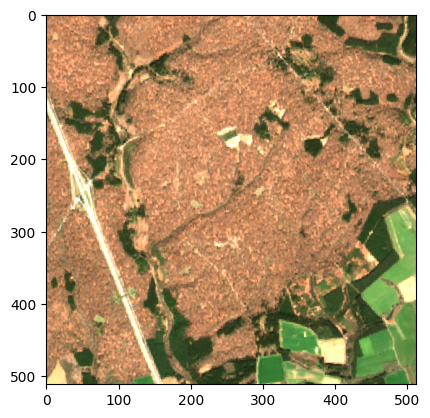

In [20]:
# PATH = "../20210303T104021_20210303T104435_T31UFR.tif"
PATH = "../image_3.tif"
img = tifffile.imread(PATH)
img = img.transpose(1,2,0)
img = img[:, :, [3,2,1]]
print(img.shape)

import matplotlib.pyplot as plt
plt.imshow(img / 10000 * 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


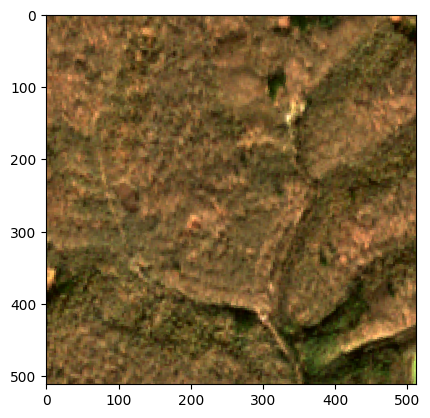

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img / 10000 * 10)